# Practical 2

In [1]:
!nvidia-smi

Sat Jan 23 17:24:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Shrey Viradiya
### 18BCE259

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
def plot_image(image):
    plt.imshow(image.squeeze(), cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.squeeze(), interpolation="nearest")
    plt.axis("off")

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_labels = tf.keras.utils.to_categorical(train_labels)
# test_labels = tf.keras.utils.to_categorical(test_labels)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
valid_images, valid_labels, test_images, test_labels = test_images[0:1000], test_labels[0:1000], test_images[1000:], test_labels[1000:]

In [5]:
train_images.shape

(60000, 28, 28, 1)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(9000, 28, 28, 1)

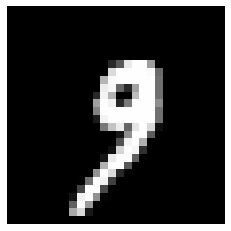

In [10]:
plot_image(test_images[0])

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

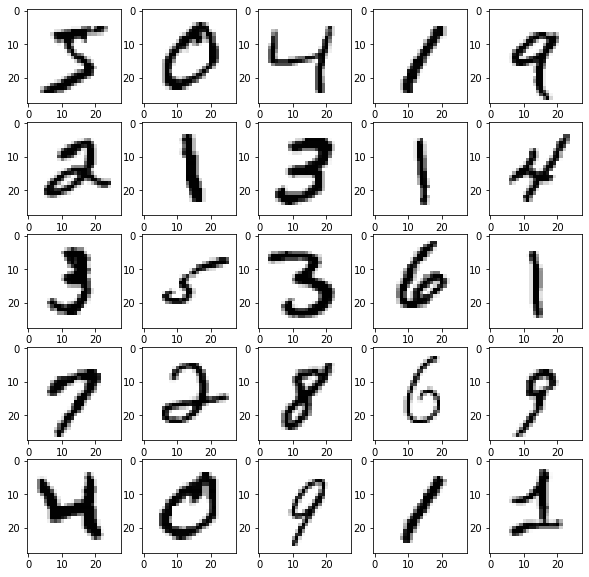

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
plt.show()

In [13]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10 , activation='softmax'),
])
model_1.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [14]:
history = model_1.fit(train_images, train_labels, epochs=30, validation_data=(valid_images, valid_labels), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4182 - accuracy: 0.8814 - val_loss: 13.4425 - val_accuracy: 0.9620
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1219 - accuracy: 0.9641 - val_loss: 9.7088 - val_accuracy: 0.9700
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0765 - accuracy: 0.9778 - val_loss: 11.9511 - val_accuracy: 0.9690
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0567 - accuracy: 0.9836 - val_loss: 13.2080 - val_accuracy: 0.9780
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 9.2084 - val_accuracy: 0.9810
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0344 - accuracy: 0.9895 - val_loss: 9.5677 - val_accuracy: 0.9810
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0243 - accuracy: 0.9931 - val_loss: 11.6007 - val_accur

In [15]:
test_loss, test_acc = model_1.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

282/282 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9800

Test accuracy: 0.9800000190734863


In [16]:
predictions = model_1.predict(test_images)

In [17]:
tf.argmax(predictions[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

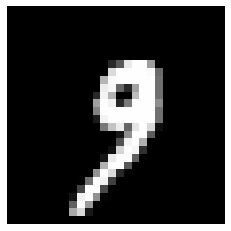

In [18]:
plot_image(test_images[0])

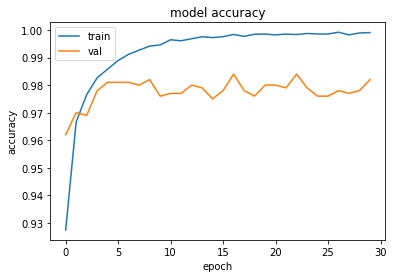

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
inp = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu')(inp)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(10 , activation='softmax')(x)

model_2 = tf.keras.Model(inputs = [inp], outputs = [out])

model_2.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [21]:
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               991360    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290  

In [22]:
history = model_2.fit(train_images, train_labels, epochs=30, validation_data=(valid_images, valid_labels), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

Epoch 1/30
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2385 - accuracy: 0.9278 - val_loss: 6.0892 - val_accuracy: 0.9870
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 7.2456 - val_accuracy: 0.9850
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9921 - val_loss: 8.4334 - val_accuracy: 0.9890
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 7.0904 - val_accuracy: 0.9900
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 10.6556 - val_accuracy: 0.9830
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 11.8449 - val_accuracy: 0.9890
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 11.3808 - val_accura

In [23]:
test_loss, test_acc = model_2.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

282/282 [==============================] - 1s 2ms/step - loss: 0.0561 - accuracy: 0.9914

Test accuracy: 0.99144446849823


In [24]:
predictions = model_2.predict(test_images)

In [25]:
tf.argmax(predictions[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

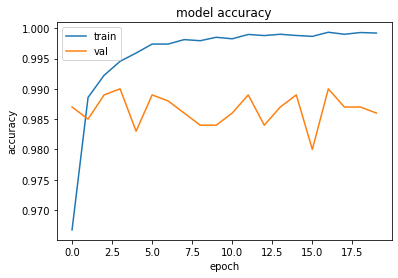

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()